# Brining Noncontributing Forces into Evidence

In [1]:
import sympy as sm
import sympy.physics.mechanics as me
me.init_vprinting()

In [2]:
q1, q2 = me.dynamicsymbols('q1, q2')
u1, u2, u3, u4 = me.dynamicsymbols('u1:5')

In [3]:
m1, m2, g, l = sm.symbols('m1, m2, g, l')

In [4]:
N = me.ReferenceFrame('N')
A = N.orientnew('A', 'Axis', (q1, N.z))
B = N.orientnew('B', 'Axis', (q2, N.z))

In [5]:
A.set_ang_vel(N, u1*N.z)
B.set_ang_vel(N, u2*N.z)

In [6]:
O = me.Point('O')
P1 = O.locatenew('P1', -l*A.y)
P2 = P1.locatenew('P2', -l*B.y)

In [7]:
O.set_vel(N, 0)

In [8]:
P1.v2pt_theory(O, N, A)

In [9]:
P2.v2pt_theory(P1, N, B)

# Introduce fictitious generalized speeds that correspond to components of desired forces and torques

In [10]:
P1.set_vel(N, P1.vel(N) - u3*A.y)
P1.vel(N)

In [11]:
P2.set_vel(N, P2.vel(N) - u4*B.y)
P2.vel(N)

In [12]:
P1.acc(N)

In [13]:
P2.acc(N)

# Introduce unknown force and torques into the resultants

In [14]:
TP1, TP2 = me.dynamicsymbols('T_{P1}, T_{P2}')

In [15]:
RP1 = -m1*g*N.y - TP1*A.y
RP2 = -m2*g*N.y - TP2*B.y

# GAF

In [16]:
F1 = P1.vel(N).diff(u1, N).dot(RP1) + P2.vel(N).diff(u1, N).dot(RP2)
F1

In [17]:
F2 = P1.vel(N).diff(u2, N).dot(RP1) + P2.vel(N).diff(u2, N).dot(RP2)
F2

In [18]:
F3 = P1.vel(N).diff(u3, N).dot(RP1) + P2.vel(N).diff(u3, N).dot(RP2)
F3

In [19]:
F4 = P1.vel(N).diff(u4, N).dot(RP1) + P2.vel(N).diff(u4, N).dot(RP2)
F4

# GIF

In [20]:
F1s = P1.vel(N).diff(u1, N).dot(-m1*P1.acc(N)) + P2.vel(N).diff(u1, N).dot(-m2*P2.acc(N))
F1s

In [21]:
F2s = P1.vel(N).diff(u2, N).dot(-m1*P1.acc(N)) + P2.vel(N).diff(u2, N).dot(-m2*P2.acc(N))
F2s

In [22]:
F3s = P1.vel(N).diff(u3, N).dot(-m1*P1.acc(N)) + P2.vel(N).diff(u3, N).dot(-m2*P2.acc(N))
F3s

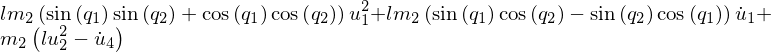

In [23]:
F4s = P1.vel(N).diff(u4, N).dot(-m1*P1.acc(N)) + P2.vel(N).diff(u4, N).dot(-m2*P2.acc(N))
F4s

In [24]:
me.find_dynamicsymbols(F1s)

# Kane's Equations

In [25]:
k1 = F1 + F1s
k2 = F2 + F2s
k3 = F3 + F3s
k4 = F4 + F4s

# Substitute zero for all fictitious quantities

In [26]:
k1_ = k1.subs({u3.diff(): 0, u4.diff(): 0, u3: 0, u4: 0})
k2_ = k2.subs({u3.diff(): 0, u4.diff(): 0, u3: 0, u4: 0})
k3_ = k3.subs({u3.diff(): 0, u4.diff(): 0, u3: 0, u4: 0})
k4_ = k4.subs({u3.diff(): 0, u4.diff(): 0, u3: 0, u4: 0})

In [27]:
kanes = [k1_, k2_, k3_, k4_]

In [28]:
me.find_dynamicsymbols(k1_)

In [29]:
me.find_dynamicsymbols(k2_)

In [30]:
me.find_dynamicsymbols(k3_)

In [31]:
me.find_dynamicsymbols(k4_)

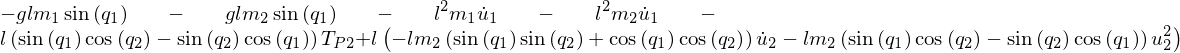

In [32]:
k1_

In [33]:
k3_

# Solve for all unknowns

In [34]:
sol = sm.solve(kanes, u1.diff(), u2.diff(), TP1, TP2)

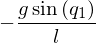

In [35]:
sol[u1.diff()].simplify()

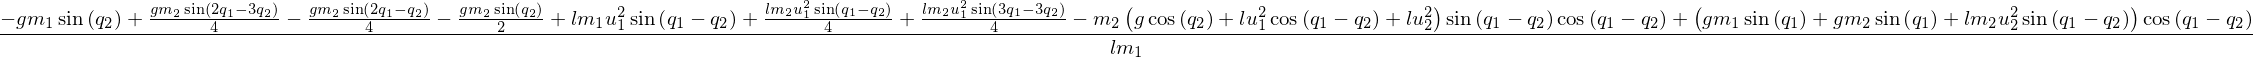

In [36]:
sol[u2.diff()].simplify()

In [37]:
sol[TP1].simplify()

In [38]:
sol[TP2].simplify()

In [39]:
TP1_sol = sol[TP1].simplify()

In [40]:
me.find_dynamicsymbols(TP1_sol)

In [41]:
TP1_sol.free_symbols

# Evaluate the force expressions with arrays

In [42]:
eval_TP1 = sm.lambdify((q1, u1, m1, g, l), TP1_sol)

In [43]:
import numpy as np

In [44]:
q1_vals = np.random.random(500)

In [45]:
u1_vals = np.random.random(500)

In [46]:
eval_TP1(q1_vals, u1_vals, 1.0, 9.81, 2.0)

array([ -9.05577865,  -8.88664878,  -9.56945348,  -9.35353409,
        -6.89076217,  -8.52140235,  -8.83758686,  -7.66483842,
        -8.01982577,  -5.51379235,  -8.02946598,  -8.67085796,
        -8.72882063, -11.00010233,  -9.58216374,  -7.03232171,
       -10.28062901,  -8.20999834, -10.11434461, -10.93250581,
        -9.22098683,  -9.22139306, -11.33116011, -10.53607492,
        -8.53911423,  -9.11685081,  -9.51717706, -10.4464532 ,
        -9.8625444 , -10.55789174,  -6.08426801,  -7.57990724,
        -8.02580124,  -6.19273093,  -8.65457967, -10.42155342,
       -10.10272948,  -9.32315002,  -6.56317932,  -9.77942826,
       -11.48757598,  -7.71004857,  -8.2902749 ,  -8.3189505 ,
        -9.73024636,  -9.73392746,  -7.56640106,  -7.33439276,
       -10.63029652,  -7.75899557,  -9.54111218,  -5.97440014,
        -9.18463884,  -9.63971282,  -9.31029427,  -9.77649087,
       -10.82020093,  -7.05998958, -10.50837668,  -6.99912428,
        -9.91903886,  -8.79128951,  -9.60464953, -11.77

In [47]:
func = lambda x, y: x + y

In [48]:
func(1, 2)

In [49]:
generate_numeric_func = sm.lambdify

In [50]:
eval_TP1 = generate_numeric_func((q1, u1, m1, g, l), TP1_sol)